<a href="https://colab.research.google.com/github/ekrell/shap_multiband/blob/main/MultiChannel_PartitionSHAP_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/conrad-blucher-institute/shap.git
import json
import numpy as np
import shap
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

  Cloning https://github.com/conrad-blucher-institute/shap.git to /tmp/pip-req-build-h6nhwumc
  Running command git clone -q https://github.com/conrad-blucher-institute/shap.git /tmp/pip-req-build-h6nhwumc
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=3069061 sha256=0b59dd6e2ed9ea2f69a6a1a69ea220a57369ef8c3782025fd1830a96c45f60e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-8in_a3tm/wheels/2a/df/e0/7c6260159a5c39dd54cb2dd8787410c3e14d9d9cc5345f1eb4
Successfully built shap


In [2]:
# load pre-trained model and data
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()

102973440/102967424 [==============================] - 3s 0us/step


In [3]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
#print("Number of ImageNet classes:", len(class_names))
#print("Class names:", class_names)

In [4]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# Partition mode 0: channels (zaxis) split last
With 500 evaluations, will never even use channel-wise masks

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [01:39, 33.19s/it]


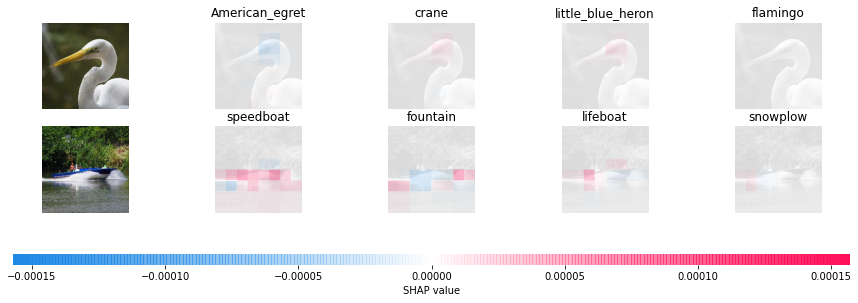

In [5]:
# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("blur(10, 10)", X[0].shape) # Default partitions scheme

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

# output with shap values
shap.image_plot(shap_values)

# Partition mode 1: channels (zaxis) split first
Break into RGB bands

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [02:58, 59.61s/it]


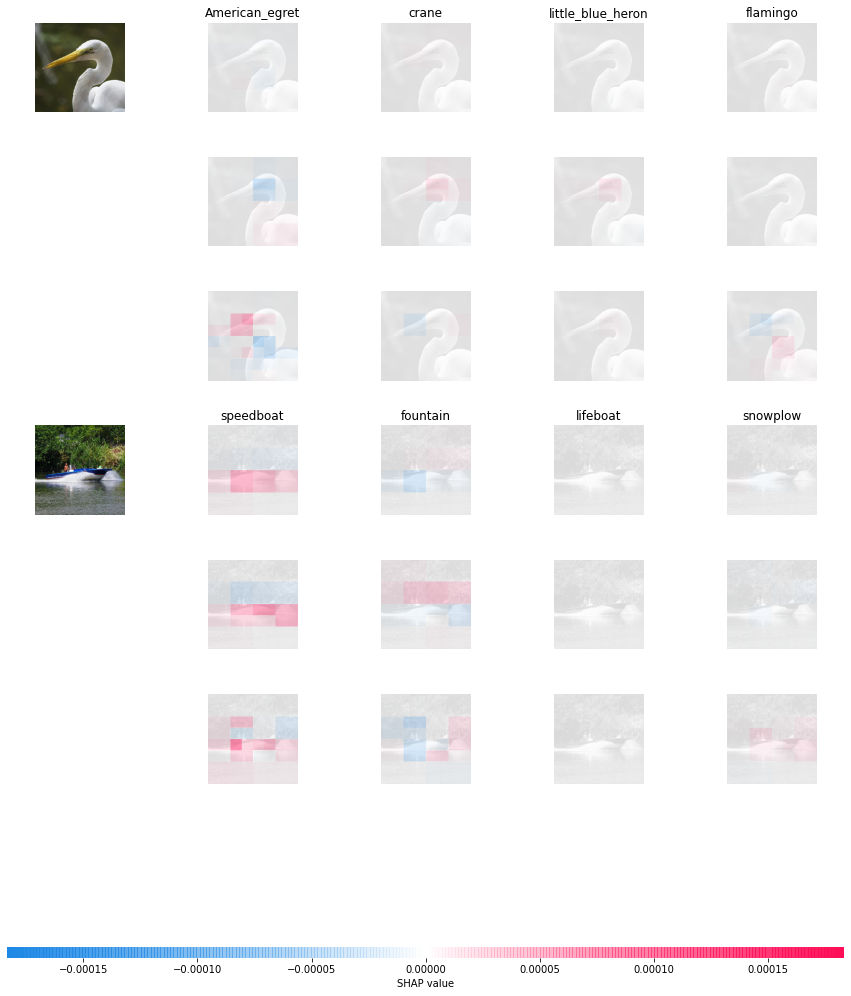

In [6]:
# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("blur(10, 10)", X[0].shape, partition_scheme=1)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

# output with shap values
shap.image_plot(shap_values, plotchannels=[0, 1, 2], hspace=0.5)